# Interactive Linear Regression Explorer

Use the sliders below to adjust:
- **Learning Rate**: How big of steps we take during gradient descent
- **Iterations**: How many training steps to run
- **Noise Level**: How noisy the training data is

Watch how these parameters affect the model fitting, loss curve, and parameter convergence!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider
import warnings
warnings.filterwarnings('ignore')

# Set up matplotlib for inline display
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 5)

In [3]:
# Generate base data
np.random.seed(42)
X = np.linspace(0, 10, 50) # array of 50 points from 0 to 10
y_true = 2 * X + 1  # True relationship: y = 2x + 1

def train_and_visualize(learning_rate=0.01, num_iterations=100, noisiness=2.0):
    """
    Train linear regression model and visualize results.
    """
    # Generate noisy data
    np.random.seed(42)
    y = y_true + np.random.randn(50) * noisiness
    
    # Initialize parameters
    m, b = 0.0, 0.0
    history = {'m': [m], 'b': [b], 'loss': []}
    
    # Training loop - Gradient Descent
    for i in range(num_iterations):
        # Forward pass
        y_pred = m * X + b # y_pred is an array of y-predictions for each X value
        
        # Compute loss (Mean Squared Error)
        loss = np.mean((y - (m * X + b)) ** 2)
        history['loss'].append(loss)
        
        dm = -2 * np.mean(X * (y - y_pred))
        db = -2 * np.mean(y - y_pred)
        
        # Update parameters
        m -= learning_rate * dm
        b -= learning_rate * db
        
        history['m'].append(m)
        history['b'].append(b)
    
    # Create visualization
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    
    # Plot 1: Data and fitted line
    axes[0].scatter(X, y, alpha=0.6, s=50, label='Training Data', color='blue')
    axes[0].plot(X, y_true, 'g--', linewidth=2.5, label='True line (y=2x+1)', alpha=0.7)
    axes[0].plot(X, m * X + b, 'r-', linewidth=2.5, 
                 label=f'Fitted line (y={m:.2f}x+{b:.2f})')
    axes[0].set_xlabel('X', fontsize=12)
    axes[0].set_ylabel('y', fontsize=12)
    axes[0].set_title(f'Linear Regression Result (noise mult {noisiness})', fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Loss over time
    axes[1].plot(np.log(history['loss']), linewidth=2.5, color='purple')
    axes[1].set_xlabel('Iteration', fontsize=12)
    axes[1].set_ylabel('Loss (MSE)', fontsize=12)
    axes[1].set_title(f'Loss During Training (LR {learning_rate})', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    
    # Plot 3: Parameter evolution
    axes[2].plot(history['m'], label='m (slope)', linewidth=2.5)
    axes[2].plot(history['b'], label='b (intercept)', linewidth=2.5)
    axes[2].axhline(y=2, color='g', linestyle='--', alpha=0.5, linewidth=2, label='True m=2')
    axes[2].axhline(y=1, color='b', linestyle='--', alpha=0.5, linewidth=2, label='True b=1')
    axes[2].set_xlabel('Iteration', fontsize=12)
    axes[2].set_ylabel('Parameter Value', fontsize=12)
    axes[2].set_title('Parameter Evolution', fontsize=14, fontweight='bold')
    axes[2].legend(fontsize=10)
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    final_loss = history['loss'][-1]
    print(f"\n{'='*60}")
    print(f"Training Results")
    print(f"{'='*60}")
    print(f"Parameters Used:")
    print(f"  Learning Rate:  {learning_rate:.4f}")
    print(f"  Iterations:     {num_iterations}")
    print(f"  Noise Level:    {noisiness:.2f}")
    print(f"\nFinal Results:")
    print(f"  m (slope):      {m:.4f}  (true: 2.0000)  [error: {abs(m-2):.4f}]")
    print(f"  b (intercept):  {b:.4f}  (true: 1.0000)  [error: {abs(b-1):.4f}]")
    print(f"  Final Loss:     {final_loss:.4f}")
    print(f"{'='*60}")
    
    # Provide interpretation
    if learning_rate < 0.005:
        print("\n💡 Learning rate is quite low - convergence is slow but stable.")
    elif learning_rate > 0.2:
        print("\n⚠️  Learning rate is high - watch for oscillation or divergence!")
    
    if final_loss > 10:
        print("💡 High loss - try more iterations or adjust learning rate.")
    elif final_loss < 5:
        print("✅ Good convergence achieved!")

## Interactive Visualization

Move the sliders to see how different hyperparameters affect training:

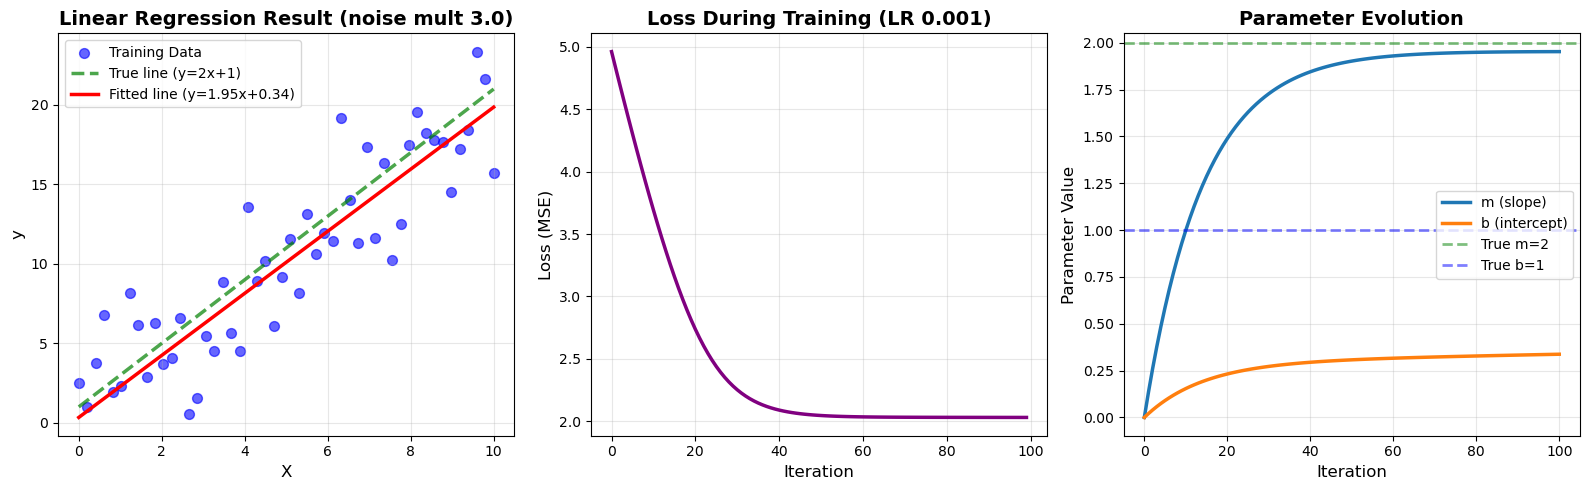


Training Results
Parameters Used:
  Learning Rate:  0.0010
  Iterations:     100
  Noise Level:    3.00

Final Results:
  m (slope):      1.9525  (true: 2.0000)  [error: 0.0475]
  b (intercept):  0.3373  (true: 1.0000)  [error: 0.6627]
  Final Loss:     7.6152

💡 Learning rate is quite low - convergence is slow but stable.


interactive(children=(FloatSlider(value=0.001, continuous_update=False, description='Learning Rate:', style=Sl…

In [4]:
interact(
    train_and_visualize,
    learning_rate=FloatSlider(
        value=0.001,
        description='Learning Rate:',
        style={'description_width': 'initial'},
        continuous_update=False
    ),
    num_iterations=IntSlider(
        value=100,
        step=10,
        description='Iterations:',
        style={'description_width': 'initial'},
        continuous_update=False
    ),
    noisiness=FloatSlider(
        value=3.0,
        step=0.1,
        description='Noise Level:',
        style={'description_width': 'initial'},
        continuous_update=False
    )
);

## Experiments to Try

1. **Too Small Learning Rate**: Set learning rate to 0.001 - notice how slowly it converges
2. **Too Large Learning Rate**: Set learning rate to 0.3+ - watch for oscillation in the parameter evolution plot
3. **High Noise**: Set noise to 4.0+ - see how it affects the final fit quality
4. **Few Iterations**: Set iterations to 20 - model doesn't have enough time to converge
5. **Sweet Spot**: Learning rate ~0.01-0.05, 100-200 iterations, noise ~2.0

## What to Observe

- **Left plot**: How well does the red line fit the blue data points?
- **Middle plot**: Does the loss decrease smoothly? Does it oscillate?
- **Right plot**: Do the parameters (m and b) converge to the true values (green/blue dashed lines)?